# Estimation of salaries of Baseball players with non-linear CART Machine learning method



In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV #
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale # for standardization
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor##  library for KNN
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

 # turn off alerts
from warnings import filterwarnings
filterwarnings ('ignore')

In [60]:
df=pd.read_csv("Hitters.csv")  
df=df.dropna() # we deleted the missing variables
dms=pd.get_dummies(df[['League','Division','NewLeague']]) # we changed categorical variables to dummys
y=df["Salary"]# the dependent variable 
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1)# The initial states of the dependent and categorical variables were excluded.
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1) # The remaining variables and dummy variables are combined into the independent variables.
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)# train test created.

In [61]:
X_train = pd.DataFrame(X_train["Hits"]) 
X_test = pd.DataFrame(X_test["Hits"])

In [62]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10) #branch check is given as a maximum of 10.

In [63]:
cart_model.fit(X_train,y_train) # CART MODEL

DecisionTreeRegressor(max_leaf_nodes=10)

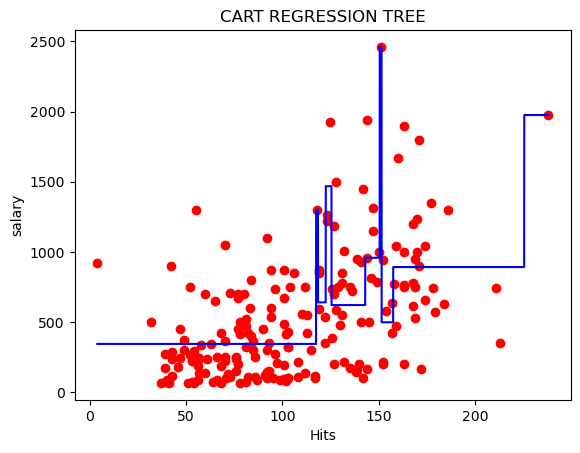

In [64]:
#visualization codes
X_grid= np.arange(min(np.array(X_train)), max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train, color= 'red')

plt.plot(X_grid,cart_model.predict(X_grid),color='blue')

plt.title('CART REGRESSION TREE')
plt.xlabel('Hits')
plt.ylabel('salary');



In [65]:
##univariate prediction
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [43]:
y_pred=cart_model.predict(X_test) #predicted values
np.sqrt(mean_squared_error(y_test,y_pred)) #RMSE

486.34593105235456

In [44]:
# using all variables
df=pd.read_csv("Hitters.csv")  
df=df.dropna() # we deleted the missing variables
dms=pd.get_dummies(df[['League','Division','NewLeague']]) # we changed categorical variables to dummys
y=df["Salary"] # the dependent variable
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1)# The initial states of the dependent and categorical variables were excluded.
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1) # The remaining variables and dummy variables are combined into the independent variables.
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)# train test created.

In [45]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [46]:
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

455.3292849666352

# Model Tuning

In [47]:
cart_model

DecisionTreeRegressor()

In [49]:
cart_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

434.3322375642359

In [50]:
cart_params={"max_depth":[2,3,4,5,10,20],
            "min_samples_split": [2,10,5,30,50,10]}


In [51]:
cart_model=DecisionTreeRegressor()

In [52]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [53]:
cart_cv_model.best_params_ #ideal values that the model gives us

{'max_depth': 5, 'min_samples_split': 50}

In [66]:
#final model
cart_tuned=DecisionTreeRegressor(max_depth=5, min_samples_split=50).fit(X_train,y_train) # maximum derinlik değeri=5
y_pred=cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

421.42024442996404